# Data poisoning

Remember the iris data? Let's see what happens to the model accuracy if we introduce incorrect data into our training set.

We first import the required libraries and iris data.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

We also do our preprocessing steps, and split our data into training and testing.

In [ ]:
# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Convert to binary classification (0 vs 1, ignoring class 2)
mask = y < 2
X, y = X[mask], y[mask]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a clean model
model_clean = LogisticRegression()
model_clean.fit(X_train, y_train)
y_pred_clean = model_clean.predict(X_test)
accuracy_clean = accuracy_score(y_test, y_pred_clean)

print(f"Clean Model Accuracy: {accuracy_clean:.2f}")

To 'poison' the data we select a certain percentage of the training labels - in this case, 40%, to flip between 1 and 0. We then train a model on this poisoned data.

Clean Model Accuracy: 1.00
Poisoned Model Accuracy: 0.93


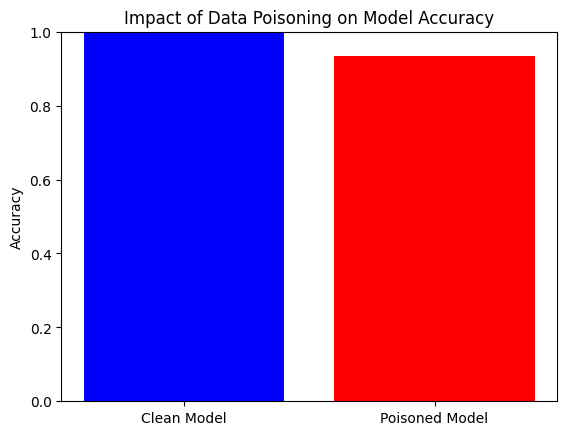

In [ ]:
# Introduce Data Poisoning: Flip % of training labels
poison_rate = 0.4
num_poisoned = int(len(y_train) * poison_rate)
poison_indices = np.random.choice(len(y_train), num_poisoned, replace=False)

# Flip labels
y_train_poisoned = y_train.copy()
y_train_poisoned[poison_indices] = 1 - y_train_poisoned[poison_indices]  # Flipping 0 <-> 1

# Train a poisoned model
model_poisoned = LogisticRegression()
model_poisoned.fit(X_train, y_train_poisoned)
y_pred_poisoned = model_poisoned.predict(X_test)
accuracy_poisoned = accuracy_score(y_test, y_pred_poisoned)

Let's test the poisoned model accuracy

In [ ]:
print(f"Poisoned Model Accuracy: {accuracy_poisoned:.2f}")

And then we display the results.

In [ ]:
# Plot results
plt.bar(["Clean Model", "Poisoned Model"], [accuracy_clean, accuracy_poisoned], color=['blue', 'red'])
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("Impact of Data Poisoning on Model Accuracy")
plt.show()